The overall tree performance is given by individual leaves performance ! <br>
When we have a small tree (ex. depth = 2,3 or 4) we can look at leaves details(impurity, # of samples) when we vizualise the whole tree, but when the tree become bigger (ex. depth >=5), it is not effective to search for all the leaves through the big tree. <br>
If you apply decision trees or tree ensembles(RandomForest, GBM) during your daily job or on kaggle competitions, you know that most of the time we need trees with depth >= 5. <br>

In this notebook, you will see how we can interpretate a big tree strucutre using its leaves details.<br>
Right now, the library contains vizualisations for number of samples from leaves. Soon will be added visualisations for leaf criterion (like entropy and gini for tree classifier or mae and mse for tree regressor) and other leaf details.






# Imports

In [1]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/..")

In [2]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dtreeviz.trees import *

import graphviz
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Utils

In [4]:
random_state = 1234

def show_decision_tree_structure(tree_model, features):
    """Show decision tree structure as a binary tree.

    It is just an utility method for graphviz functionality to render a decision tree structure.

    :return: graphviz.files.Source
    """

    dot_data = sklearn.tree.export_graphviz(tree_model, out_file=None, feature_names=features,
                                            filled=True, node_ids=True)
    return graphviz.Source(dot_data)

# Load data
We will use the well known dataset, Titanic, to demonstrate all the vizualisations.

In [5]:
dataset = pd.read_csv("../data/titanic/titanic.csv")

In [6]:
dataset.shape

(891, 12)

## EDA

In [7]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
dataset.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature engineer

In [11]:
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)

In [12]:
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes

# Classification 

## Feature and target variables

In [13]:
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

## Model training
We will train with full data, the goal is to just interpretate the tree structure

In [14]:
dtc = DecisionTreeClassifier(max_depth=7, random_state=random_state)
dtc.fit(dataset[features], dataset[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

## Model interpretation
Here we have a tree with depth=7. Take your time to look through it structure and try to find its leaves.

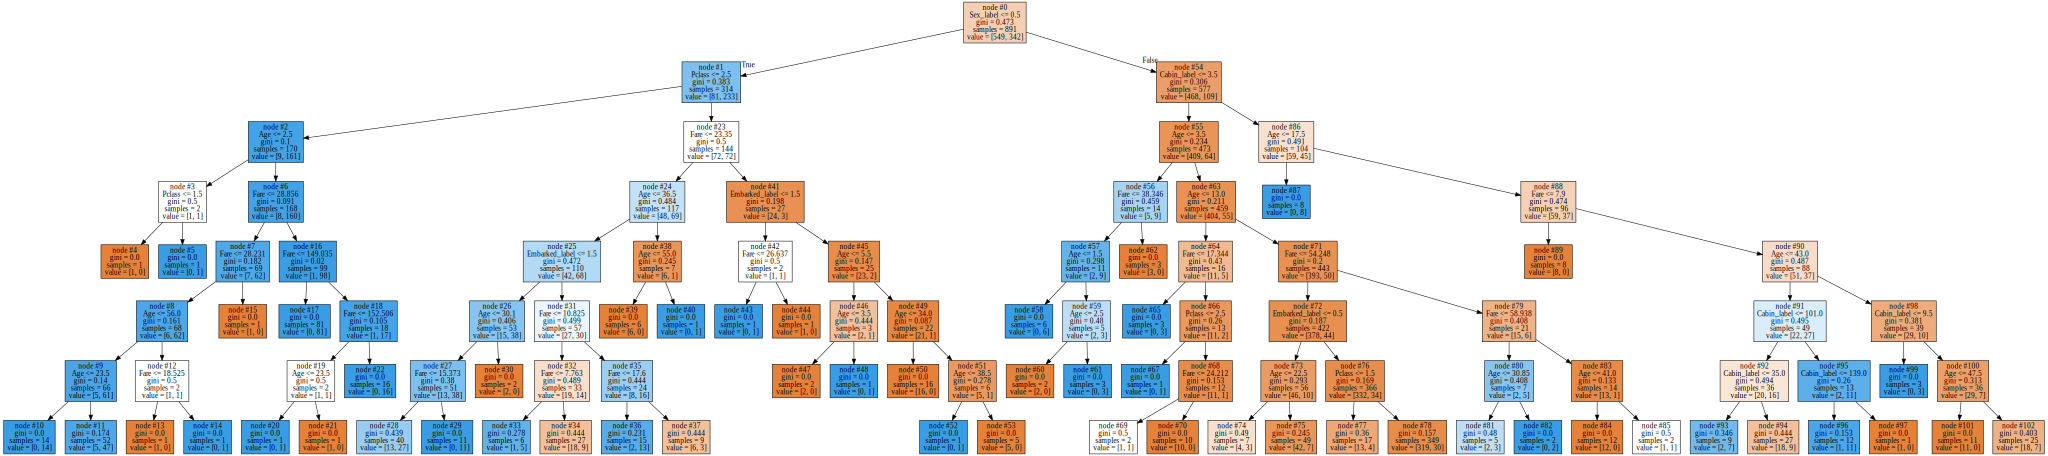

In [15]:
show_decision_tree_structure(dtc, features)

### Leaf samples
Each node contains some important details. One of these is 'samples', which shows the number of samples from training set which pass through that node.<br>
Would be very helpful to see the number of samples from each leaf. Why? Because it shows the confidence of leaf prediction. <br>
For example, if we have a leaf with good prediction(ex. gini=0.0) but very few samples in in (ex. samples=1), this could be the sign of overfiting. If our leaf would contains more samples, then we could be more confident about its prediction. <br>

This is how we can easily get leaf samples from a big tree structure (using plots or plain text)


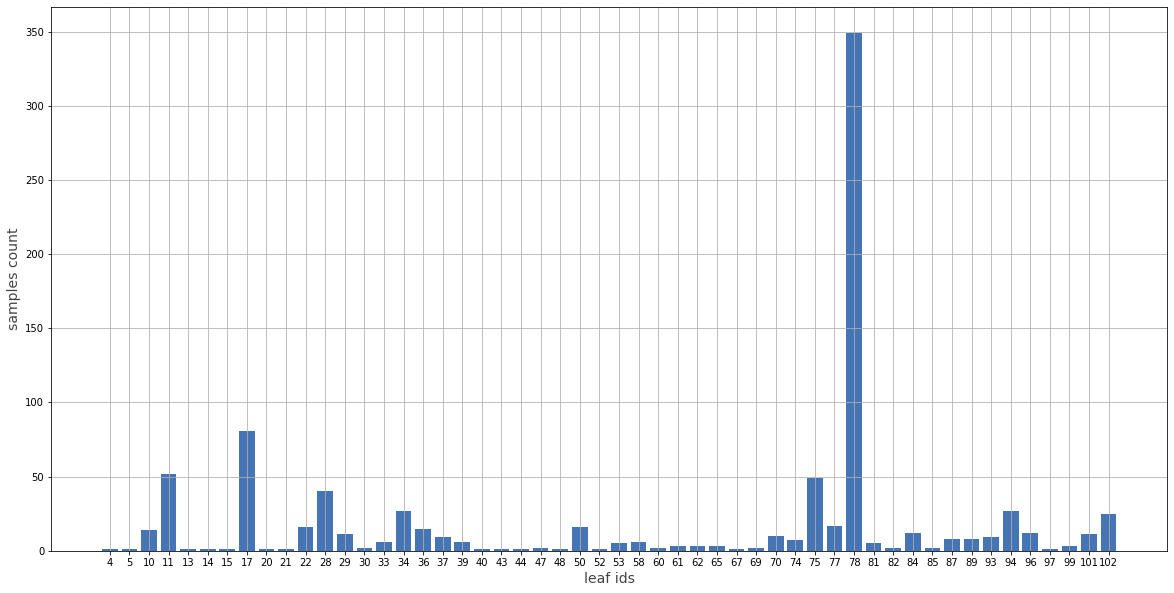

In [23]:
viz_leaf_samples(dtc, figsize=(20,10))

In [24]:
viz_leaf_samples(dtc, display_type="text")

leaf 4 has 1 samples
leaf 5 has 1 samples
leaf 10 has 14 samples
leaf 11 has 52 samples
leaf 13 has 1 samples
leaf 14 has 1 samples
leaf 15 has 1 samples
leaf 17 has 81 samples
leaf 20 has 1 samples
leaf 21 has 1 samples
leaf 22 has 16 samples
leaf 28 has 40 samples
leaf 29 has 11 samples
leaf 30 has 2 samples
leaf 33 has 6 samples
leaf 34 has 27 samples
leaf 36 has 15 samples
leaf 37 has 9 samples
leaf 39 has 6 samples
leaf 40 has 1 samples
leaf 43 has 1 samples
leaf 44 has 1 samples
leaf 47 has 2 samples
leaf 48 has 1 samples
leaf 50 has 16 samples
leaf 52 has 1 samples
leaf 53 has 5 samples
leaf 58 has 6 samples
leaf 60 has 2 samples
leaf 61 has 3 samples
leaf 62 has 3 samples
leaf 65 has 3 samples
leaf 67 has 1 samples
leaf 69 has 2 samples
leaf 70 has 10 samples
leaf 74 has 7 samples
leaf 75 has 49 samples
leaf 77 has 17 samples
leaf 78 has 349 samples
leaf 81 has 5 samples
leaf 82 has 2 samples
leaf 84 has 12 samples
leaf 85 has 2 samples
leaf 87 has 8 samples
leaf 89 has 8 sampl

### Leaf samples by class
Here we can see the number of samples from each leaf by its classes. <br>
The leaf with id 78 contains a lot of samples from training set and mojority of them from class 0. In leaf 17 all samples are from class 1. Would be very helpful to see how the samples from these leaves look, what do they have in common. This is a way to get domain knowledge about our dataset using a ML driven approach. <br>
More about how we can get the training samples from a leaf in the near future.

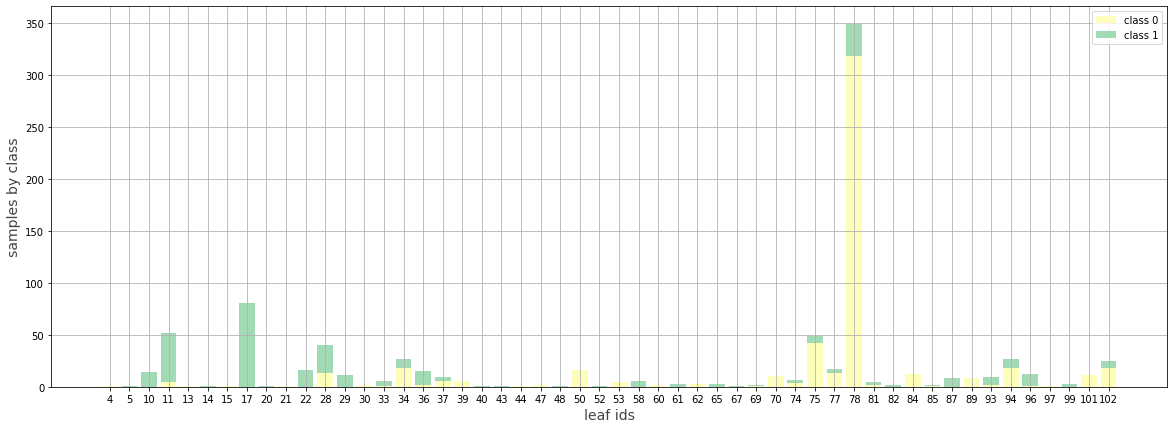

In [30]:
viz_leaf_samples_by_class(dtc, figsize=(20,7))

In [32]:
viz_leaf_samples_by_class(dtc, display_type="text")

leaf 4, samples : 1.0, 0.0
leaf 5, samples : 0.0, 1.0
leaf 10, samples : 0.0, 14.0
leaf 11, samples : 5.0, 47.0
leaf 13, samples : 1.0, 0.0
leaf 14, samples : 0.0, 1.0
leaf 15, samples : 1.0, 0.0
leaf 17, samples : 0.0, 81.0
leaf 20, samples : 0.0, 1.0
leaf 21, samples : 1.0, 0.0
leaf 22, samples : 0.0, 16.0
leaf 28, samples : 13.0, 27.0
leaf 29, samples : 0.0, 11.0
leaf 30, samples : 2.0, 0.0
leaf 33, samples : 1.0, 5.0
leaf 34, samples : 18.0, 9.0
leaf 36, samples : 2.0, 13.0
leaf 37, samples : 6.0, 3.0
leaf 39, samples : 6.0, 0.0
leaf 40, samples : 0.0, 1.0
leaf 43, samples : 0.0, 1.0
leaf 44, samples : 1.0, 0.0
leaf 47, samples : 2.0, 0.0
leaf 48, samples : 0.0, 1.0
leaf 50, samples : 16.0, 0.0
leaf 52, samples : 0.0, 1.0
leaf 53, samples : 5.0, 0.0
leaf 58, samples : 0.0, 6.0
leaf 60, samples : 2.0, 0.0
leaf 61, samples : 0.0, 3.0
leaf 62, samples : 3.0, 0.0
leaf 65, samples : 0.0, 3.0
leaf 67, samples : 0.0, 1.0
leaf 69, samples : 1.0, 1.0
leaf 70, samples : 10.0, 0.0
leaf 74, sa

# Regression

## feature and target variables
To keep the same dataset for regression, now our task is to predict the age.

In [33]:
features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target_reg = "Age"

## Model training

In [34]:
dtr = DecisionTreeRegressor(max_depth=7, random_state=random_state)
dtr.fit(dataset[features_reg], dataset[target_reg])

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

## Model interpretation

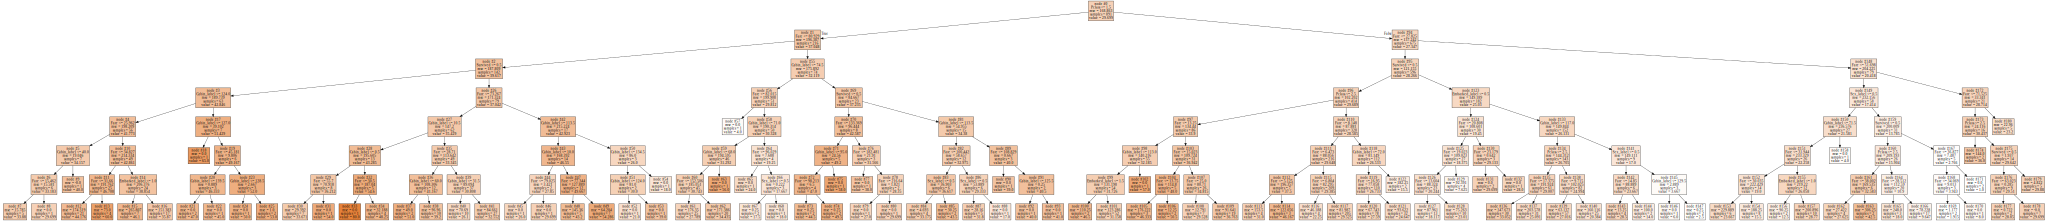

In [35]:
show_decision_tree_structure(dtr, features_reg)

### Leaf samples

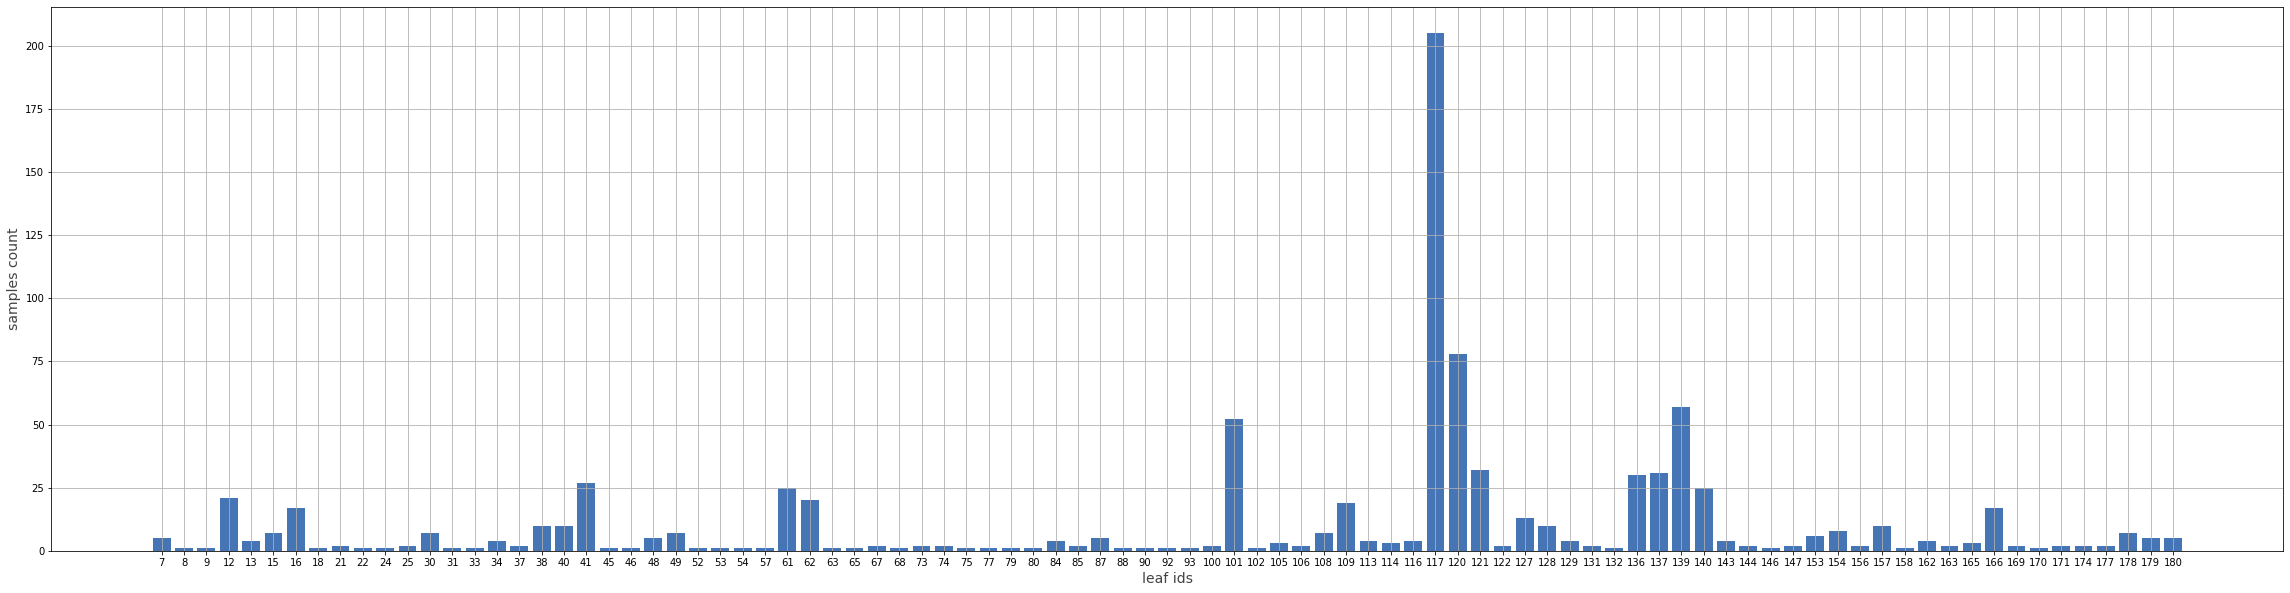

In [36]:
viz_leaf_samples(dtr, figsize=(40,10))

In [38]:
viz_leaf_samples(dtr, display_type="text")

leaf 7 has 5 samples
leaf 8 has 1 samples
leaf 9 has 1 samples
leaf 12 has 21 samples
leaf 13 has 4 samples
leaf 15 has 7 samples
leaf 16 has 17 samples
leaf 18 has 1 samples
leaf 21 has 2 samples
leaf 22 has 1 samples
leaf 24 has 1 samples
leaf 25 has 2 samples
leaf 30 has 7 samples
leaf 31 has 1 samples
leaf 33 has 1 samples
leaf 34 has 4 samples
leaf 37 has 2 samples
leaf 38 has 10 samples
leaf 40 has 10 samples
leaf 41 has 27 samples
leaf 45 has 1 samples
leaf 46 has 1 samples
leaf 48 has 5 samples
leaf 49 has 7 samples
leaf 52 has 1 samples
leaf 53 has 1 samples
leaf 54 has 1 samples
leaf 57 has 1 samples
leaf 61 has 25 samples
leaf 62 has 20 samples
leaf 63 has 1 samples
leaf 65 has 1 samples
leaf 67 has 2 samples
leaf 68 has 1 samples
leaf 73 has 2 samples
leaf 74 has 2 samples
leaf 75 has 1 samples
leaf 77 has 1 samples
leaf 79 has 1 samples
leaf 80 has 1 samples
leaf 84 has 4 samples
leaf 85 has 2 samples
leaf 87 has 5 samples
leaf 88 has 1 samples
leaf 90 has 1 samples
leaf 9